Visualization of the expansion of the graph to transform it into a suitable input for models that were trained on VGG. The function "imageNet_transform" adds three channels, and expands the size of the image to be at least 224x224 pixels

In [48]:
import math
import torch
import numpy as np
import matplotlib.pyplot as plt

import sys
import os
sys.path.append(os.path.abspath(os.path.join('..')))

import src.graphs_generation as graphs_generation

Size of the graph that needs no resizing: torch.Size([1, 1, 150, 150])
Size of the graph that needs resizing: torch.Size([1, 3, 300, 300])


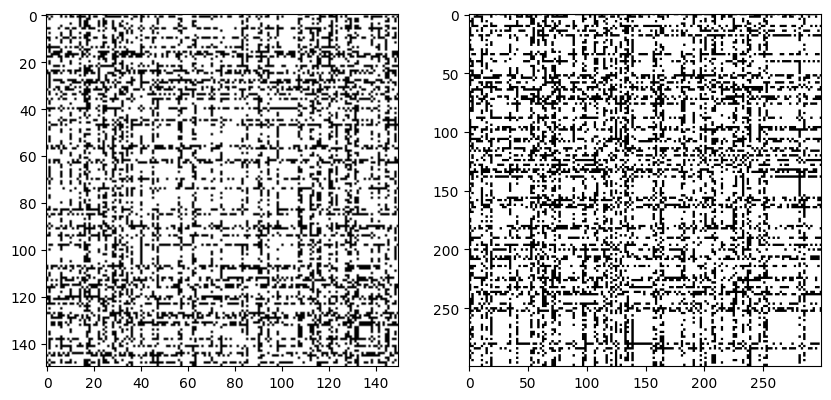

In [51]:
# Generating graphs:
# generating a single graph that will not be used as input to pretrained models:
no_resize_graph = graphs_generation.generate_graphs(1, 150, 100, "p_increase", False)[0]
print("Size of the graph that needs no resizing:", no_resize_graph.shape)
no_resize_graph = np.squeeze(no_resize_graph)

# generating a single graph that will be used as input to pretrained models:
resize_graph = graphs_generation.generate_graphs(1, 150, 100, "p_increase", True)[0]
print("Size of the graph that needs resizing:", resize_graph.shape)
resize_graph = np.squeeze(resize_graph)
resize_graph = resize_graph[0, :, :]

# plotting the graphs:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Set the aspect ratio of the images
axs[0].set_aspect('equal')
axs[1].set_aspect('equal')

# Display the images
axs[0].imshow(no_resize_graph, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
axs[1].imshow(resize_graph, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)

# Show the plot
plt.show()
